In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso

## 1) 데이터 준비

In [18]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [19]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [20]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 2) 학습/테스트 분할 및 특성 공학

In [21]:
# 다항 특성: 5차까지, 절편항 제외 (절편은 모델이 처리)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 표준화
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

print('train_scaled shape:', train_scaled.shape)
print('예시 특성 이름(앞 10개):', poly.get_feature_names_out()[:10])

train_scaled shape: (42, 55)
예시 특성 이름(앞 10개): ['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3']


## 3) alpha 스윕: 계수 크기 변화 관찰

In [22]:

# 알파 값 목록(로그 스케일)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

records = []
for alpha in alpha_list:
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    ridge_coef = ridge.coef_
    ridge_l2 = np.linalg.norm(ridge_coef, ord=2)   # L2 노름(계수 크기)

    # Lasso (반복 충분히 확보)
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    lasso_coef = lasso.coef_
    lasso_l2 = np.linalg.norm(lasso_coef, ord=2)   # L2 노름

    records.append({
        'alpha': alpha,
        'ridge_L2_norm': ridge_l2,
        'lasso_L2_norm': lasso_l2
    })

df = pd.DataFrame(records)
df

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


,alpha,ridge_L2_norm,lasso_L2_norm
0,0.001,1642.969714,1419.131239
1,0.010,575.452433,1055.820298
2,0.100,146.026429,193.289616
3,1.000,64.638032,159.087843
4,10.000,52.994005,175.877000
5,100.000,45.905432,186.310249


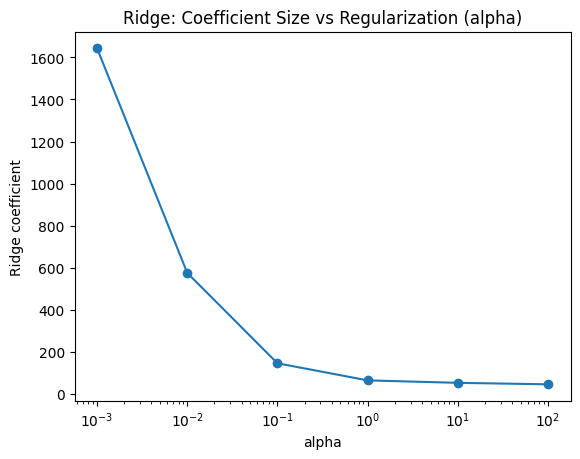

In [23]:
# 1) Ridge: alpha vs 계수 L2 노름
plt.figure()
plt.plot(df['alpha'], df['ridge_L2_norm'], marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Ridge coefficient')
plt.title('Ridge: Coefficient Size vs Regularization (alpha)')
plt.show()

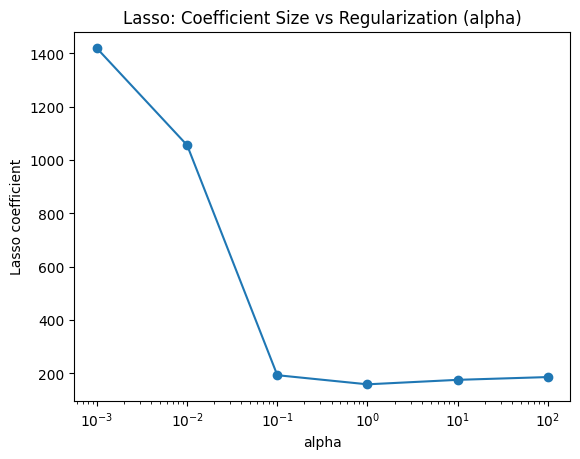

In [24]:
# 2) Lasso: alpha vs 계수 L2 노름
plt.figure()
plt.plot(df['alpha'], df['lasso_L2_norm'], marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Lasso coefficient')
plt.title('Lasso: Coefficient Size vs Regularization (alpha)')
plt.show()